In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

The IMDB dataset has labels for both positive and negative sentiments related to movie reviews.

Every review is converted into a set of word embeddings during the dataset's preparation, where each word is represented by a fixed-size vector.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


custom-trained embedding layer with training sample size = 100

In [3]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 115ms/step - loss: 0.6887 - acc: 0.5875 - val_loss: 0.7015 - val_acc: 0.3000
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6639 - acc: 0.

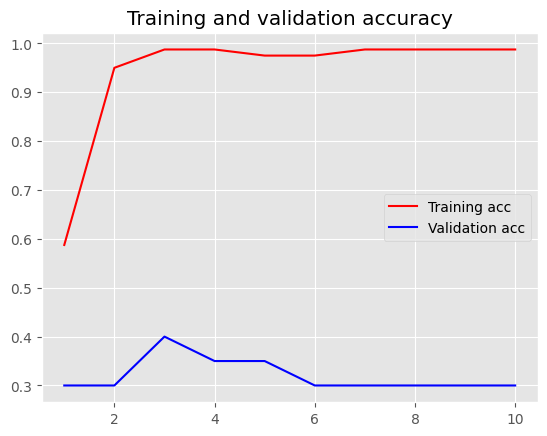

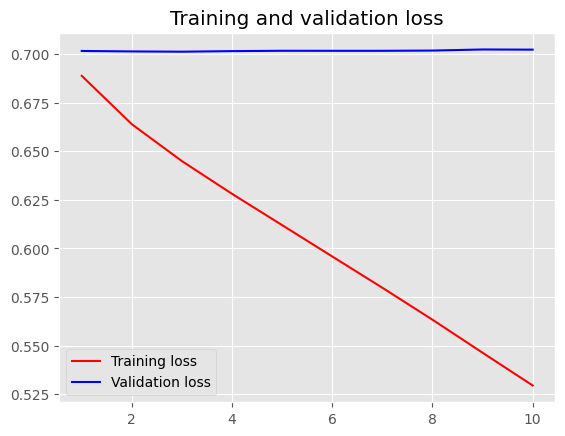

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6947 - acc: 0.4992
Test loss: 0.6947306990623474
Test accuracy: 0.4991999864578247


custom-trained embedding layer with training sample size = 5000

In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 2s 10ms/step - loss: 0.6922 - acc: 0.5145 - val_loss: 0.6912 - val_acc: 0.5310
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.6719 - acc: 0.7230 - val_loss: 0.6837 - val_acc: 0.5920
Epoch 3/10
125/

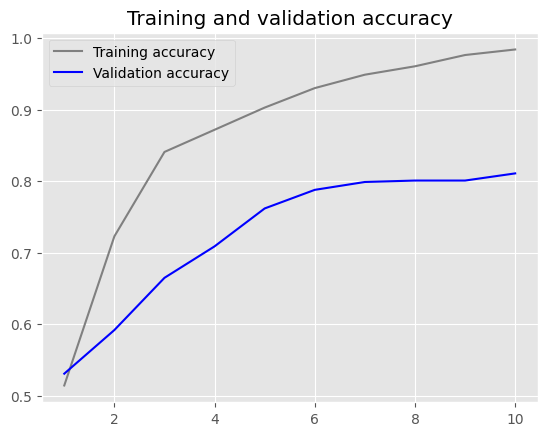

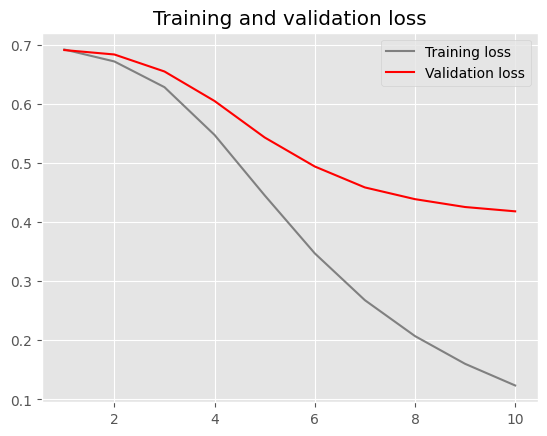

In [8]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 1s 1ms/step - loss: 0.3996 - acc: 0.8176
Test loss: 0.3996331989765167
Test accuracy: 0.8175600171089172


custom-trained embedding layer with training sample size = 1000

In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.6930 - acc: 0.5088 - val_loss: 0.6955 - val_acc: 0.4850
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6754 - acc: 0.7638 - val_loss: 0.6952 - val_acc: 0.4900
Epoch 3/10
25/25 [=

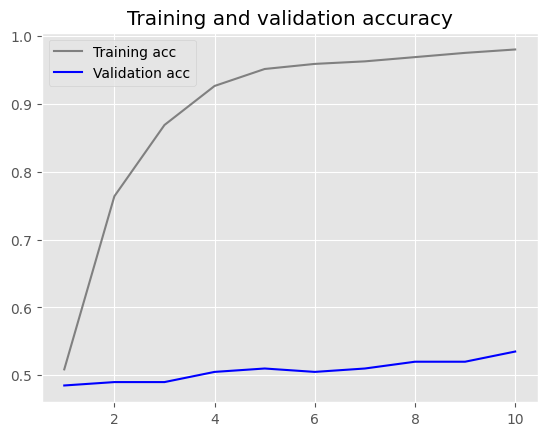

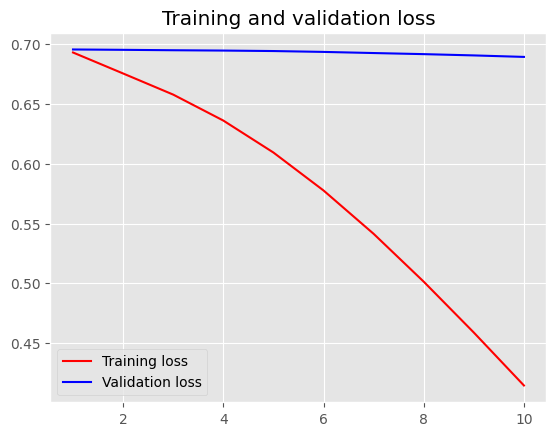

In [12]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 1s 2ms/step - loss: 0.6821 - acc: 0.5608
Test loss: 0.6821173429489136
Test accuracy: 0.5607600212097168


In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 2s 6ms/step - loss: 0.6881 - acc: 0.5621 - val_loss: 0.6723 - val_acc: 0.6760
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6017 - acc: 0.7879 - val_loss: 0.5429 - val_acc: 0.7845
Epoch 3/10
250/2

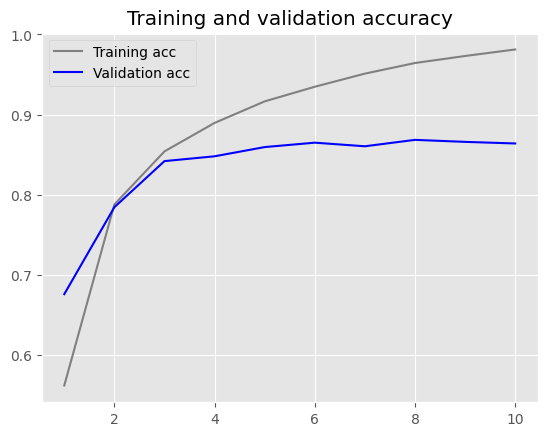

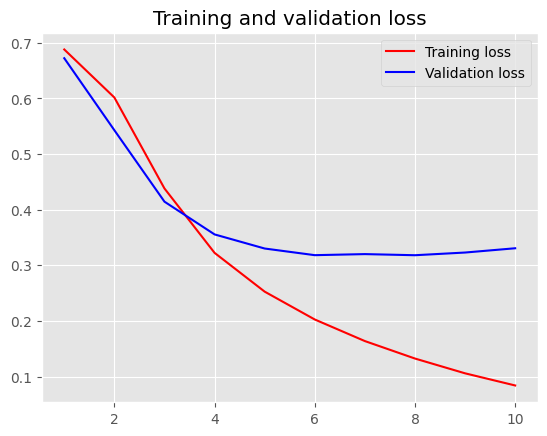

In [16]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 1s 1ms/step - loss: 0.3415 - acc: 0.8538
Test loss: 0.3415137827396393
Test accuracy: 0.8537600040435791


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  33.6M      0  0:00:02  0:00:02 --:--:-- 33.6M


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Making Use of Trained Word Embeds You can utilize pretrained word embeddings if there is insufficient training data to obtain word embeddings along with the problem you want to address..






Tokenizing the data

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data] # (200, 100)
y_train = labels[:train_data] # shape (200,)
x_validation = data[train_data:train_data+valid_data] # shape (10000, 100)
y_validation = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


Using Gigaword 5 and Wikipedia data, we trained the 6B version of the GloVe model, which comprises 400,000 words and 6 billion tokens.

Setting up the matrix of GloVe word embeddings

pretrained word embedding layer with a 100-person training sample



In [22]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

The Embeddig layer is equipped with pre-trained word embedding. Setting this to False before calling the Embedding layer guarantees that it cannot be trained. If you set trainable = True, the optimization technique has the ability to modify the word embedding values. The greatest way to keep students from forgetting what they already "know" is to avoid updating pretrained areas while they are still receiving instruction.

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 4.8297 - acc: 0.4600 - val_loss: 0.7883 - val_acc: 0.5215
Epoch 2/10
4/4 [==============================] - 1s 405ms/step - loss: 0.3684 - acc: 0.8200 - val_loss: 1.1982 - val_acc: 0.5116
Epoch 3/10
4/4 [==============================] - 1s 441ms/step - loss: 0.2525 - acc: 0.8900 - val_loss: 0.9256 - val_acc: 0.5137
Epoch 4/10
4/4 [==============================] - 1s 451ms/step - loss: 0.1234 - acc: 0.9800 - val_loss: 0.9468 - val_acc: 0.5174
Epoch 5/10
4/4 [==============================] - 3s 876ms/step - loss: 0.0793 - acc: 1.0000 - val_loss: 1.1025 - val_acc: 0.5114
Epoch 6/10
4/4 [==============================] - 1s 399ms/step - loss: 0.0673 - acc: 1.0000 - val_loss: 1.3626 - val_acc: 0.5108
Epoch 7/10
4/4 [==============================] - 1s 454ms/step - loss: 0.5205 - acc: 0.7700 - val_loss: 1.0323 - val_acc: 0.5112
Epoch 8/10
4/4 [==============================] - 1s 443ms/step - loss: 0.0399 - acc: 1.0000 

Given the limited amount of training data, this rapid overfitting of the model is to be expected. The wide variance in validation accuracy may be explained by the same process.

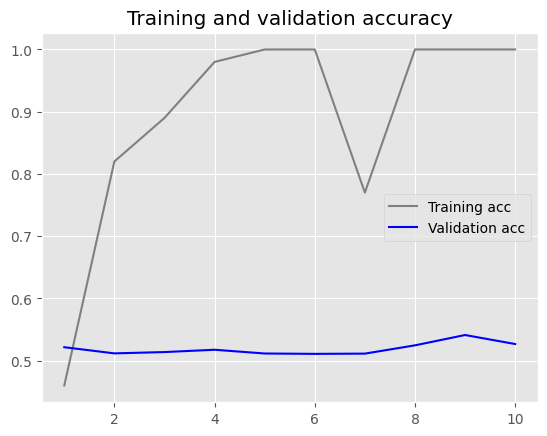

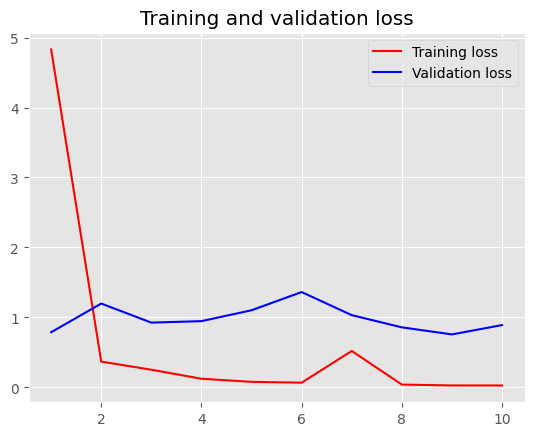

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.9126 - acc: 0.5064
Test loss: 0.9125772714614868
Test accuracy: 0.5064399838447571


pretrained word embedding layer with training sample size = 5000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 

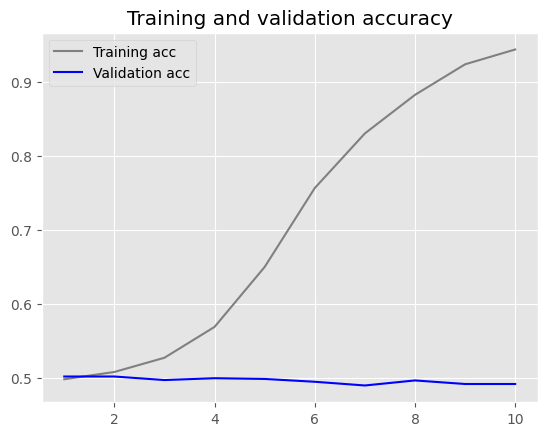

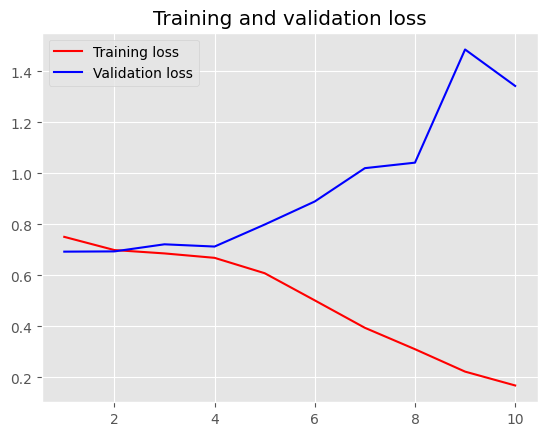

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000 # Training sample is 5000
valid_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 2s 2ms/step - loss: 1.2896 - acc: 0.4962
Test loss: 1.2895792722702026
Test accuracy: 0.4962399899959564


pretrained word embedding layer with training sample size = 1000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 2s

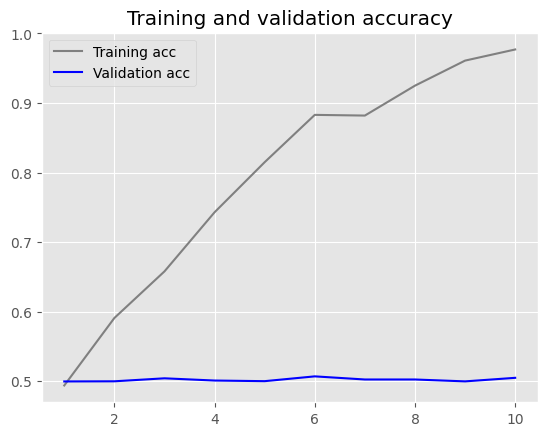

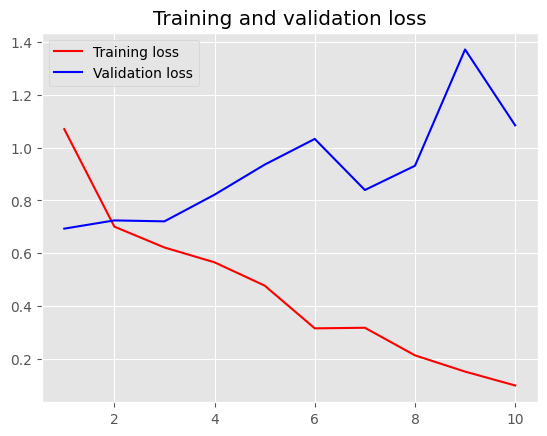

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 4s 4ms/step - loss: 1.1270 - acc: 0.4981
Test loss: 1.1269736289978027
Test accuracy: 0.4981200098991394


pretrained word embedding layer with training sample size = 10000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 

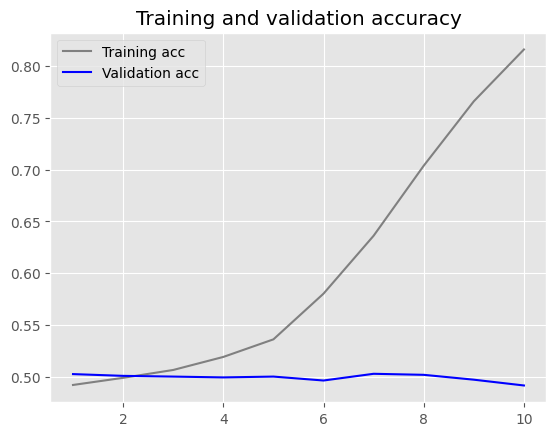

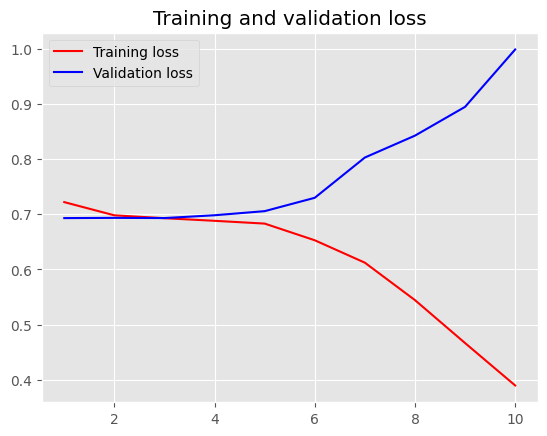

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 2s 2ms/step - loss: 0.9660 - acc: 0.4999
Test loss: 0.9659616947174072
Test accuracy: 0.49987998604774475
